## Experiment 2: classificator test

Some usefull packages:

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
import operator
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lambda function to flatten the list of coordinates:

In [2]:
flatten = lambda l: [item for sublist in l for item in sublist]

Let's load our data:

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
texts = pd.read_csv('data/texts.csv')

Let's lemmatize our texts in order to put them into Persistent class

In [4]:
texts.TEXT = texts.TEXT.str.replace('[^\w\s]','')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

texts['TEXT_L'] = texts.TEXT.apply(lemmatize_text)

Let's check the results:

In [5]:
texts.head(10)

,ID,TEXT,TEXT_L
0,0,Let me know how to contact you Ive you settled...,"[Let, me, know, how, to, contact, you, Ive, yo..."
1,1,Where can download clear movies Dvd copies,"[Where, can, download, clear, movie, Dvd, copy]"
2,2,Desires u going to doctor 4 liver And get a bi...,"[Desires, u, going, to, doctor, 4, liver, And,..."
3,3,Do you like Italian food,"[Do, you, like, Italian, food]"
4,4,HouseMaid is the murderer coz the man was murd...,"[HouseMaid, is, the, murderer, coz, the, man, ..."
5,5,True Its easier with her here,"[True, Its, easier, with, her, here]"
6,6,I am not sure about night menu I know only a...,"[I, am, not, sure, about, night, menu, I, know..."
7,7,You have 1 new voicemail Please call 08719181511,"[You, have, 1, new, voicemail, Please, call, 0..."
8,8,Doing nothing then u not having dinner w us,"[Doing, nothing, then, u, not, having, dinner,..."
9,9,Eerie Nokia tones 4u rply TONE TITLE to 8007 e...,"[Eerie, Nokia, tone, 4u, rply, TONE, TITLE, to..."


### 1. Persistent homology attempt:

Usefull packages:

In [6]:
from persistent.persistent import Persistent
import numpy as np

In [7]:
texts_l = texts.TEXT_L

Let's make persistent diagramm for each text word2vec implementation and use it as features:

In [8]:
texts_ph = []

for element in texts_l:
    
    if element:
        a = Persistent(split_sent=element, min_count=1, window=1)
        dgms = a.persistent()
        texts_ph.append(flatten([[p.birth for p in dgms[1]], [p.death for p in dgms[1]]]))
    else:
        texts_ph.append([])

Then transform our data to dataframe:

In [9]:
text_ph_df = pd.DataFrame(texts_ph)
text_ph_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389
0,-0.002109,-0.002048,-0.001875,-0.001544,-0.001314,-0.001178,-0.001146,-0.001000,-0.000892,-0.000814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.002137,-0.002113,-0.001775,-0.001771,-0.001542,-0.001315,-0.001171,-0.001166,-0.001089,-0.000905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.003630,-0.002137,-0.002091,-0.002028,-0.001914,-0.001906,-0.001602,-0.001540,-0.001417,-0.001311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.002281,-0.001969,-0.001170,-0.000884,-0.000814,-0.000764,-0.000640,-0.000607,-0.000586,-0.000458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.002029,-0.001833,-0.001577,-0.001557,-0.001506,-0.001479,-0.001315,-0.001201,-0.001170,-0.001000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.002225,-0.001918,-0.001521,-0.000929,-0.000701,-0.000658,-0.000406,-0.000131,-0.000085,-0.000064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.002491,-0.002209,-0.001934,-0.001780,-0.001772,-0.001401,-0.000891,-0.000827,-0.000811,-0.000687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.001935,-0.001710,-0.001487,-0.001410,-0.001313,-0.001287,-0.001166,-0.000994,-0.000855,-0.000840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.002272,-0.002042,-0.001933,-0.001767,-0.001141,-0.001093,-0.000967,-0.000837,-0.000698,-0.000683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.002323,-0.002117,-0.001844,-0.001774,-0.001605,-0.001453,-0.001414,-0.001371,-0.001341,-0.001319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And fill NaN's with 0 and make train and test set's:

In [44]:
text_ph_df['ID'] = texts['ID']

X_train = pd.merge(train, text_ph_df.fillna(0), on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train = pd.factorize(train['CATEGORY'])[0]

#### 1.1 PH representation test:

Let's load some models which are often used in classification tasks:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

And implement them with basic parametres:

In [34]:
svc = SVC(verbose=True)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(verbose=True)
rfc = RandomForestClassifier(verbose=True)
abc = AdaBoostClassifier()
bc = BaggingClassifier(verbose=True)
etc = ExtraTreesClassifier(verbose=True)

In [35]:
clfs = {'SVC' : svc,'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

This is the function to test our models:

In [36]:
def cv_res(clf, X, y):
    return np.mean(cross_val_score(clf, X, y, cv=10, scoring='roc_auc', n_jobs=1))

In [45]:
pred_scores_ph = []
for k,v in clfs.items():
    pred = cv_res(v, X_train, y_train)
    print((k, pred))
    pred_scores_ph.append((k, pred))

('ETC', 0.94133249802586216)
('AdaBoost', 0.94408050830103107)
('BgC', 0.93120357971773282)
('KN', 0.91987607214531319)
('DT', 0.86223097399407655)
('SVC', 0.93968547882396436)
('RF', 0.94180839763139979)
('LR', 0.94566431857093036)


Let's see the plot:

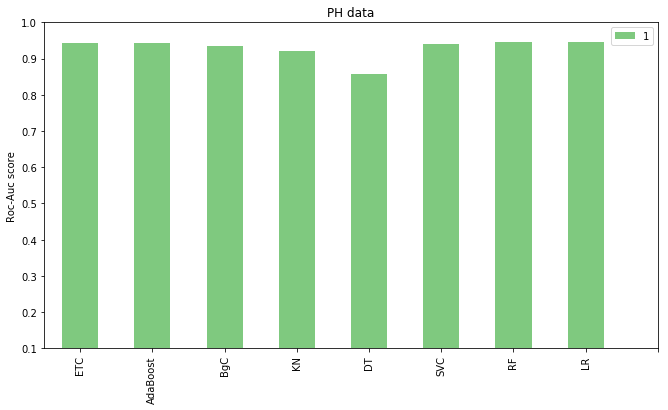

In [20]:
pd.DataFrame(pred_scores).plot(kind='bar', ylim=(0.1,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores)[0])
plt.ylabel('Roc-Auc score')
plt.title('PH data')

plt.show()

Let's compute the average score:

In [24]:
scores = []

for el in pred_scores:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.928820128686
0.945664318571


Average is 0.928820128686, best model is Linear Regression with 0.945664318571 score

### 2. Tf-idf attempt:

In [26]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_features=10000)

text_tfidf = word_vectorizer.fit_transform(texts.TEXT).toarray()

text_tfidf = pd.DataFrame(text_tfidf)

text_tfidf['ID'] = texts['ID']

In [29]:
X_train_ti = pd.merge(train, text_tfidf, on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train_ti = pd.factorize(train['CATEGORY'])[0]

In [34]:
pred_scores = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_ti, y_train_ti)
    print((k, pred))
    pred_scores.append((k, pred))

('ETC', 0.9730094729919424)
('AdaBoost', 0.94760455626051476)
('BgC', 0.96296286586115054)
('KN', 0.81963648864078364)
('DT', 0.9079393535993221)
('SVC', 0.97529289892127413)
('RF', 0.97658532331903503)
('LR', 0.98355075588543495)


In [36]:
scores = []

for el in pred_scores:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.943322714435
0.983550755885


In [71]:
a[2] = b[1]
a = a.rename(columns={1: 'Tf-idf', 2: 'PH'})
a

,0,Tf-idf,PH
0,ETC,0.973009,0.941332
1,AdaBoost,0.947605,0.944081
2,BgC,0.962963,0.931204
3,KN,0.819636,0.919876
4,DT,0.907939,0.862231
5,SVC,0.975293,0.939685
6,RF,0.976585,0.941808
7,LR,0.983551,0.945664


Comparison of perfomance on spam-sms dataset.

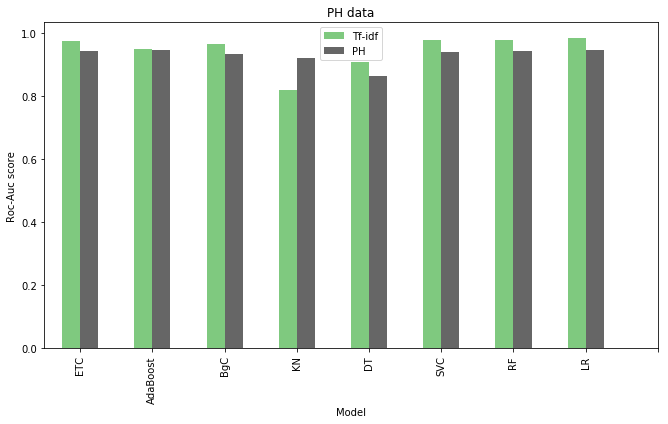

In [72]:
a.plot(x=0, y=['Tf-idf', 'PH'], kind="bar", figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores)[0])
plt.ylabel('Roc-Auc score')
plt.xlabel('Model')
plt.title('PH data')
plt.show()


### 2. Bag of words attempt:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)

text_bow = bigram_vectorizer.fit_transform(texts.TEXT).toarray()

text_bow = pd.DataFrame(text_bow)

text_bow['ID'] = texts['ID']

In [20]:
X_train_bow = pd.merge(train, text_bow, on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train_bow = pd.factorize(train['CATEGORY'])[0]

In [37]:
pred_scores_bow = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_bow, y_train_bow)
    print((k, pred))
    pred_scores_bow.append((k, pred))

('DT', 0.90851949055113845)
('KN', 0.8326076762721808)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]('LR', 0.98443192439763028)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('ETC', 0.97518123980811411)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]('SVC', 0.96041436937546809)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('RF', 0.96976590651599825)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]

('BgC', 0.96025577313028221)
('AdaBoost', 0.96373613179597106)


In [38]:
pred_scores_bow

[('DT', 0.90851949055113845),
 ('KN', 0.8326076762721808),
 ('LR', 0.98443192439763028),
 ('ETC', 0.97518123980811411),
 ('SVC', 0.96041436937546809),
 ('RF', 0.96976590651599825),
 ('BgC', 0.96025577313028221),
 ('AdaBoost', 0.96373613179597106)]

In [39]:
pred_scores_tdidf = [('ETC', 0.9730094729919424),
('AdaBoost', 0.94760455626051476),
('BgC', 0.96296286586115054),
('KN', 0.81963648864078364),
('DT', 0.9079393535993221),
('SVC', 0.97529289892127413),
('RF', 0.97658532331903503),
('LR', 0.98355075588543495)]

In [40]:
pred_scores_persist = [('ETC', 0.94133249802586216),
('AdaBoost', 0.94408050830103107),
('BgC', 0.93120357971773282),
('KN', 0.91987607214531319),
('DT', 0.86223097399407655),
('SVC', 0.93968547882396436),
('RF', 0.94180839763139979),
('LR', 0.94566431857093036)]

In [41]:
a = pd.DataFrame(pred_scores_bow)
b = pd.DataFrame(pred_scores_tdidf)
c = pd.DataFrame(pred_scores_persist)

In [42]:
a[2] = b[1]
a[3] = c[1]

In [43]:
a

,0,1,2,3
0,DT,0.908519,0.973009,0.941332
1,KN,0.832608,0.947605,0.944081
2,LR,0.984432,0.962963,0.931204
3,ETC,0.975181,0.819636,0.919876
4,SVC,0.960414,0.907939,0.862231
5,RF,0.969766,0.975293,0.939685
6,BgC,0.960256,0.976585,0.941808
7,AdaBoost,0.963736,0.983551,0.945664


In [44]:
a = a.rename(columns={1: 'BoW', 2: 'Tf-idf', 3: 'w2v + PH'})

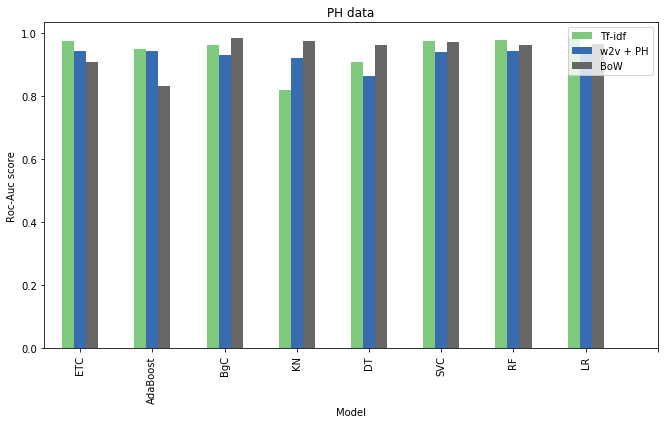

In [49]:
a.plot(x=0, y=['Tf-idf', 'w2v + PH', 'BoW'], kind="bar", figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores_tdidf)[0])
plt.ylabel('Roc-Auc score')
plt.xlabel('Model')
plt.title('Different models perfomance on spam dataset')
plt.show()

In [50]:
max(pred_scores_bow)

('SVC', 0.96041436937546809)

In [53]:
scores = []

for el in pred_scores_bow:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.944364063981
0.984431924398
